In [1]:
import numpy as np

def summation_unit(inputs, weights, bias=0):
    """
    Summation unit that computes the weighted sum of inputs plus a bias term.
    
    :param inputs: List or numpy array of inputs.
    :param weights: List or numpy array of weights corresponding to inputs.
    :param bias: Bias term, defaults to 0.
    
    :return: Weighted sum of inputs plus bias.
    """
    return np.dot(inputs, weights) + bias


In [2]:
def step_function(x):
    """
    Step activation function. Returns 1 if input is greater than or equal to 0, otherwise 0.
    """
    return 1 if x >= 0 else 0


In [3]:
def bipolar_step_function(x):
    """
    Bipolar step function. Returns 1 if input is greater than or equal to 0, otherwise -1.
    """
    return 1 if x >= 0 else -1


In [4]:
def sigmoid(x):
    """
    Sigmoid activation function.
    """
    return 1 / (1 + np.exp(-x))


In [5]:
def tanh(x):
    """
    Tanh activation function.
    """
    return np.tanh(x)


In [6]:
def relu(x):
    """
    ReLU activation function. Returns max(0, x).
    """
    return max(0, x)


In [7]:
def leaky_relu(x, alpha=0.01):
    """
    Leaky ReLU activation function. Returns x if x > 0, else alpha * x.
    
    :param alpha: Slope for negative values, defaults to 0.01.
    """
    return x if x > 0 else alpha * x


In [8]:
def mean_squared_error(y_true, y_pred):
    """
    Mean squared error (MSE) comparator unit.
    
    :param y_true: List or numpy array of true values.
    :param y_pred: List or numpy array of predicted values.
    
    :return: MSE between true and predicted values.
    """
    return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)


In [9]:
def mean_absolute_error(y_true, y_pred):
    """
    Mean absolute error (MAE) comparator unit.
    
    :param y_true: List or numpy array of true values.
    :param y_pred: List or numpy array of predicted values.
    
    :return: MAE between true and predicted values.
    """
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))


Converged after 130 epochs
Final weights: [-0.10000000000000765, 0.1000000000000001, 0.05000000000000032]
Number of epochs: 130


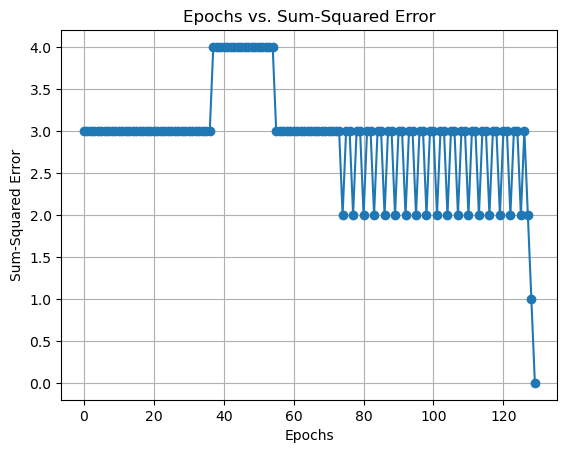

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron model function
def perceptron_and_gate(X, Y, W, learning_rate=0.05, epochs=1000, convergence_threshold=0.002):
    errors = []  # To store sum-squared error for each epoch
    num_epochs = 0  # Counter for epochs

    for epoch in range(epochs):
        sum_squared_error = 0  # Reset error for this epoch
        
        for i in range(len(X)):
            # Weighted sum
            weighted_sum = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            
            # Activation function (step function)
            y_pred = step_function(weighted_sum)
            
            # Error calculation
            error = Y[i] - y_pred
            
            # Update weights
            W[1] += learning_rate * error * X[i][0]
            W[2] += learning_rate * error * X[i][1]
            W[0] += learning_rate * error  # Update bias term
            
            # Sum-squared error for this sample
            sum_squared_error += error**2
        
        # Append total sum-squared error for this epoch
        errors.append(sum_squared_error)
        
        num_epochs += 1
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            print(f"Converged after {num_epochs} epochs")
            break

    return W, errors, num_epochs

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input values (X1, X2)
Y = np.array([0, 0, 0, 1])  # Corresponding outputs for AND gate

# Initial weights and learning rate
W = [10, 0.2, -0.75]  # [Bias, W1, W2]
learning_rate = 0.05

# Train the perceptron model
W_final, errors, num_epochs = perceptron_and_gate(X, Y, W, learning_rate)

# Print final weights and number of epochs
print(f"Final weights: {W_final}")
print(f"Number of epochs: {num_epochs}")

# Plot the sum-squared error vs. epochs
plt.plot(range(num_epochs), errors, marker='o')
plt.title('Epochs vs. Sum-Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.grid(True)
plt.show()


In [11]:
def bipolar_step_function(x):
    return 1 if x > 0 else -1 if x < 0 else 0


In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [13]:
def relu(x):
    return max(0, x)


Bipolar Step Activation:
Sigmoid Activation:
ReLU Activation:
Converged after 390 epochs


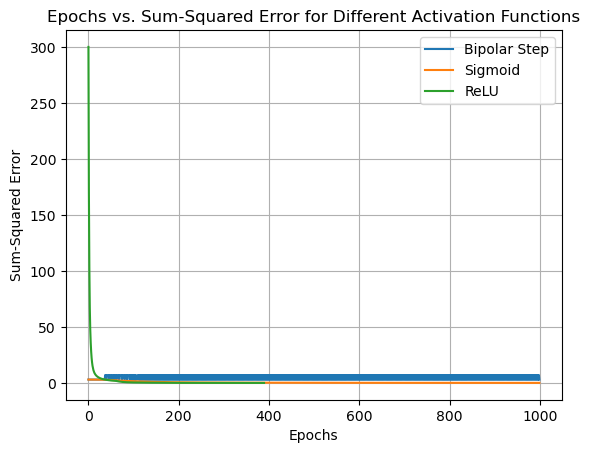

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def bipolar_step_function(x):
    return 1 if x > 0 else -1 if x < 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# Perceptron model function with flexible activation
def perceptron_and_gate(X, Y, W, activation_function, learning_rate=0.05, epochs=1000, convergence_threshold=0.002):
    errors = []  # To store sum-squared error for each epoch
    num_epochs = 0  # Counter for epochs

    for epoch in range(epochs):
        sum_squared_error = 0  # Reset error for this epoch
        
        for i in range(len(X)):
            # Weighted sum
            weighted_sum = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            
            # Activation function
            y_pred = activation_function(weighted_sum)
            
            # Error calculation
            error = Y[i] - y_pred
            
            # Update weights
            W[1] += learning_rate * error * X[i][0]
            W[2] += learning_rate * error * X[i][1]
            W[0] += learning_rate * error  # Update bias term
            
            # Sum-squared error for this sample
            sum_squared_error += error**2
        
        # Append total sum-squared error for this epoch
        errors.append(sum_squared_error)
        
        num_epochs += 1
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            print(f"Converged after {num_epochs} epochs")
            break

    return W, errors, num_epochs

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input values (X1, X2)
Y = np.array([0, 0, 0, 1])  # Corresponding outputs for AND gate

# Initial weights and learning rate
W = [10, 0.2, -0.75]  # [Bias, W1, W2]
learning_rate = 0.05

# Train the perceptron model with different activation functions

# Bipolar Step Activation
print("Bipolar Step Activation:")
W_bipolar = W.copy()
W_final_bipolar, errors_bipolar, epochs_bipolar = perceptron_and_gate(X, Y, W_bipolar, bipolar_step_function, learning_rate)

# Sigmoid Activation
print("Sigmoid Activation:")
W_sigmoid = W.copy()
W_final_sigmoid, errors_sigmoid, epochs_sigmoid = perceptron_and_gate(X, Y, W_sigmoid, sigmoid, learning_rate)

# ReLU Activation
print("ReLU Activation:")
W_relu = W.copy()
W_final_relu, errors_relu, epochs_relu = perceptron_and_gate(X, Y, W_relu, relu, learning_rate)

# Plot the sum-squared error vs. epochs for each activation function
plt.plot(range(epochs_bipolar), errors_bipolar, label='Bipolar Step')
plt.plot(range(epochs_sigmoid), errors_sigmoid, label='Sigmoid')
plt.plot(range(epochs_relu), errors_relu, label='ReLU')
plt.title('Epochs vs. Sum-Squared Error for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.legend()
plt.grid(True)
plt.show()


Learning rate: 0.1, Epochs to converge: 68
Learning rate: 0.2, Epochs to converge: 37
Learning rate: 0.3, Epochs to converge: 23
Learning rate: 0.4, Epochs to converge: 23
Learning rate: 0.5, Epochs to converge: 19
Learning rate: 0.6, Epochs to converge: 19
Learning rate: 0.7, Epochs to converge: 15
Learning rate: 0.8, Epochs to converge: 14
Learning rate: 0.9, Epochs to converge: 13
Learning rate: 1.0, Epochs to converge: 12


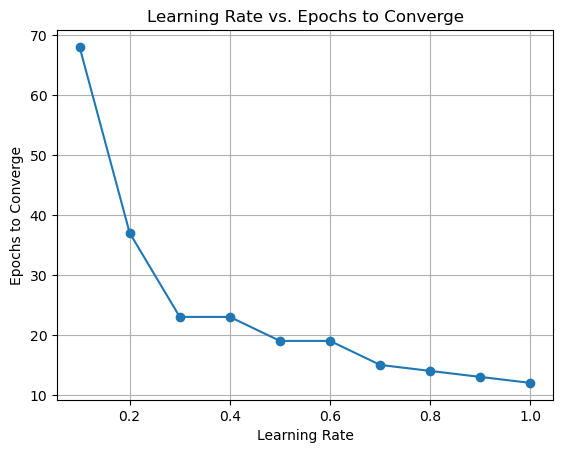

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron model function with flexible learning rate
def perceptron_and_gate_learning_rate(X, Y, W, learning_rate, epochs=1000, convergence_threshold=0.002):
    num_epochs = 0  # Counter for epochs

    for epoch in range(epochs):
        sum_squared_error = 0  # Reset error for this epoch
        
        for i in range(len(X)):
            # Weighted sum
            weighted_sum = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            
            # Activation function (step function)
            y_pred = step_function(weighted_sum)
            
            # Error calculation
            error = Y[i] - y_pred
            
            # Update weights
            W[1] += learning_rate * error * X[i][0]
            W[2] += learning_rate * error * X[i][1]
            W[0] += learning_rate * error  # Update bias term
            
            # Sum-squared error for this sample
            sum_squared_error += error**2
        
        num_epochs += 1
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            return num_epochs  # Return epochs needed to converge

    return epochs  # Return max epochs if not converged

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input values (X1, X2)
Y = np.array([0, 0, 0, 1])  # Corresponding outputs for AND gate

# Initial weights
initial_weights = [10, 0.2, -0.75]  # [Bias, W1, W2]

# List of learning rates to try
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Store results
epochs_needed = []

# Run the experiment for each learning rate
for lr in learning_rates:
    # Copy initial weights for each run
    W = initial_weights.copy()
    
    # Train the perceptron and get the number of epochs for convergence
    epochs = perceptron_and_gate_learning_rate(X, Y, W, learning_rate=lr)
    epochs_needed.append(epochs)
    print(f"Learning rate: {lr}, Epochs to converge: {epochs}")

# Plot the learning rate vs epochs to converge
plt.plot(learning_rates, epochs_needed, marker='o')
plt.title('Learning Rate vs. Epochs to Converge')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.grid(True)
plt.show()


Step Activation (XOR):


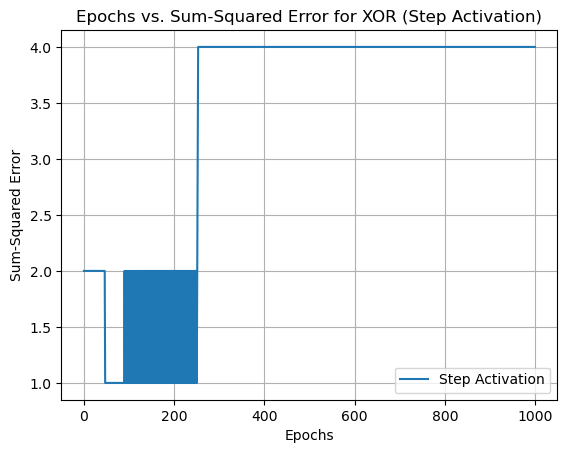

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron model function for XOR gate logic
def perceptron_xor_gate(X, Y, W, activation_function, learning_rate=0.05, epochs=1000, convergence_threshold=0.002):
    errors = []  # To store sum-squared error for each epoch
    num_epochs = 0  # Counter for epochs

    for epoch in range(epochs):
        sum_squared_error = 0  # Reset error for this epoch
        
        for i in range(len(X)):
            # Weighted sum
            weighted_sum = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            
            # Activation function
            y_pred = activation_function(weighted_sum)
            
            # Error calculation
            error = Y[i] - y_pred
            
            # Update weights
            W[1] += learning_rate * error * X[i][0]
            W[2] += learning_rate * error * X[i][1]
            W[0] += learning_rate * error  # Update bias term
            
            # Sum-squared error for this sample
            sum_squared_error += error**2
        
        # Append total sum-squared error for this epoch
        errors.append(sum_squared_error)
        
        num_epochs += 1
        
        # Check for convergence
        if sum_squared_error <= convergence_threshold:
            print(f"Converged after {num_epochs} epochs")
            break

    return W, errors, num_epochs

# XOR gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input values (X1, X2)
Y = np.array([0, 1, 1, 0])  # Corresponding outputs for XOR gate

# Initial weights and learning rate
W = [10, 0.2, -0.75]  # [Bias, W1, W2]
learning_rate = 0.05

# Train the perceptron model for XOR gate using Step activation
print("Step Activation (XOR):")
W_final_step, errors_step, epochs_step = perceptron_xor_gate(X, Y, W, step_function, learning_rate)

# Plot the sum-squared error vs. epochs for XOR gate (Step activation)
plt.plot(range(epochs_step), errors_step, label='Step Activation')
plt.title('Epochs vs. Sum-Squared Error for XOR (Step Activation)')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.legend()
plt.grid(True)
plt.show()


Bipolar Step Activation (XOR):
Sigmoid Activation (XOR):
ReLU Activation (XOR):


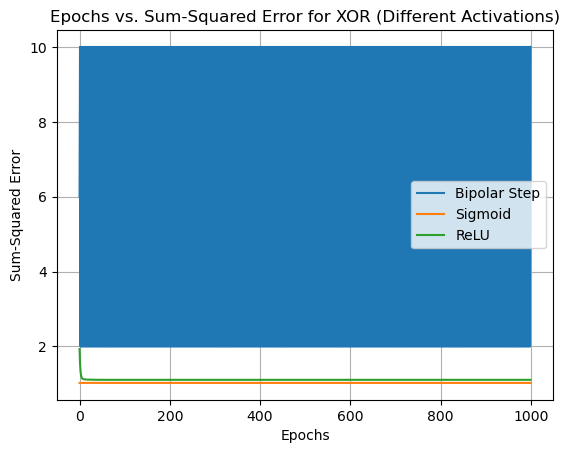

In [17]:
# Activation functions
def bipolar_step_function(x):
    return 1 if x > 0 else -1 if x < 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# Train the perceptron with XOR gate and different activation functions

# Bipolar Step Activation
print("Bipolar Step Activation (XOR):")
W_bipolar = W.copy()
W_final_bipolar, errors_bipolar, epochs_bipolar = perceptron_xor_gate(X, Y, W_bipolar, bipolar_step_function, learning_rate)

# Sigmoid Activation
print("Sigmoid Activation (XOR):")
W_sigmoid = W.copy()
W_final_sigmoid, errors_sigmoid, epochs_sigmoid = perceptron_xor_gate(X, Y, W_sigmoid, sigmoid, learning_rate)

# ReLU Activation
print("ReLU Activation (XOR):")
W_relu = W.copy()
W_final_relu, errors_relu, epochs_relu = perceptron_xor_gate(X, Y, W_relu, relu, learning_rate)

# Plot the sum-squared error vs. epochs for each activation function (XOR gate)
plt.plot(range(epochs_bipolar), errors_bipolar, label='Bipolar Step')
plt.plot(range(epochs_sigmoid), errors_sigmoid, label='Sigmoid')
plt.plot(range(epochs_relu), errors_relu, label='ReLU')
plt.title('Epochs vs. Sum-Squared Error for XOR (Different Activations)')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.legend()
plt.grid(True)
plt.show()


Learning rate: 0.1, Epochs to converge (XOR): ([0.1000000000000188, -0.19999999999999982, -0.14999999999999997], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (10, 3) + inhomogeneous part.

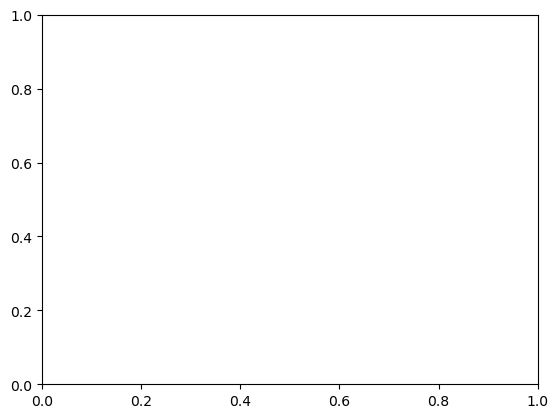

In [18]:
# List of learning rates to try
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Store results
epochs_needed_xor = []

# Run the experiment for each learning rate
for lr in learning_rates:
    # Copy initial weights for each run
    W = initial_weights.copy()
    
    # Train the perceptron and get the number of epochs for convergence
    epochs_xor = perceptron_xor_gate(X, Y, W, step_function, learning_rate=lr)
    epochs_needed_xor.append(epochs_xor)
    print(f"Learning rate: {lr}, Epochs to converge (XOR): {epochs_xor}")

# Plot the learning rate vs epochs to converge for XOR gate
plt.plot(learning_rates, epochs_needed_xor, marker='o')
plt.title('Learning Rate vs. Epochs to Converge (XOR Gate)')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.grid(True)
plt.show()


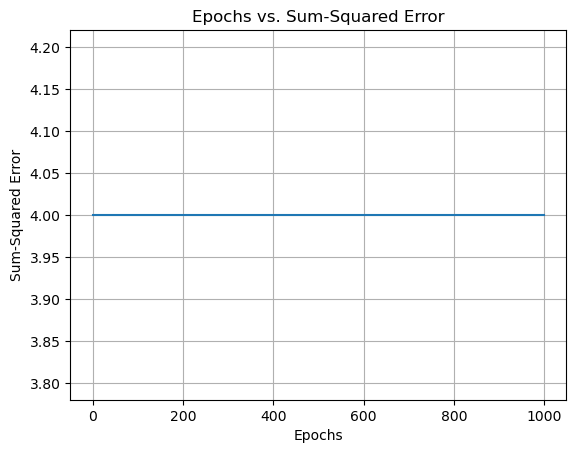

Predicted vs Actual Results:
   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       0          1
4       1          1
5       0          1
6       1          1
7       1          1
8       0          1
9       0          1


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative for weight updates
def sigmoid_derivative(output):
    return output * (1 - output)

# Function to train the perceptron
def train_perceptron(X, y, learning_rate=0.1, epochs=1000):
    np.random.seed(42)
    
    # Initialize weights randomly
    W = np.random.rand(X.shape[1])
    bias = np.random.rand(1)
    
    errors = []  # To store sum-squared errors per epoch

    for epoch in range(epochs):
        sum_squared_error = 0
        
        for i in range(X.shape[0]):
            # Compute the weighted sum (dot product of inputs and weights + bias)
            weighted_sum = np.dot(X[i], W) + bias
            
            # Apply sigmoid activation
            y_pred = sigmoid(weighted_sum)
            
            # Compute the error
            error = y[i] - y_pred
            
            # Update weights and bias
            W += learning_rate * error * sigmoid_derivative(y_pred) * X[i]
            bias += learning_rate * error * sigmoid_derivative(y_pred)
            
            # Sum-squared error
            sum_squared_error += error**2
        
        errors.append(sum_squared_error)
    
    return W, bias, errors

# Data from the customer table (input and output features)
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk_Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High_Value_Tx': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Feature matrix (input: candies, mangoes, milk packets, payment)
X = df[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']].values

# Target vector (output: high value transaction or not)
y = df['High_Value_Tx'].values

# Train the perceptron using the sigmoid activation function
learning_rate = 0.1
epochs = 1000

W, bias, errors = train_perceptron(X, y, learning_rate, epochs)

# Plot sum-squared error vs. epochs to observe convergence
plt.plot(range(epochs), errors)
plt.title('Epochs vs. Sum-Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.grid(True)
plt.show()

# Function to make predictions using the trained perceptron
def predict(X, W, bias):
    weighted_sum = np.dot(X, W) + bias
    y_pred = sigmoid(weighted_sum)
    return np.where(y_pred >= 0.5, 1, 0)

# Predict classifications for the training data
y_pred = predict(X, W, bias)

# Display predicted vs actual results
results = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
})

print("Predicted vs Actual Results:")
print(results)


In [20]:
import numpy as np
import pandas as pd

# Data from the customer table (input and output features)
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk_Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High_Value_Tx': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Feature matrix (input: candies, mangoes, milk packets, payment)
X = df[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']].values

# Target vector (output: high value transaction or not)
y = df['High_Value_Tx'].values

# Add a bias term to the feature matrix (a column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Pseudo-inverse solution: W = (X^T X)^(-1) X^T y
X_pseudo_inverse = np.linalg.pinv(X)  # Compute pseudo-inverse of X
W_pseudo_inverse = np.dot(X_pseudo_inverse, y)  # Compute weights using pseudo-inverse

# Make predictions using the pseudo-inverse weights
y_pred_pseudo_inverse = np.dot(X, W_pseudo_inverse)

# Apply a threshold to convert predictions to 0 or 1 (since it's binary classification)
y_pred_pseudo_inverse = np.where(y_pred_pseudo_inverse >= 0.5, 1, 0)

# Display predicted vs actual results for pseudo-inverse
results_pseudo_inverse = pd.DataFrame({
    'Actual': y,
    'Predicted_Pseudo_Inverse': y_pred_pseudo_inverse
})

print("Predicted vs Actual Results using Pseudo-Inverse:")
print(results_pseudo_inverse)


Predicted vs Actual Results using Pseudo-Inverse:
   Actual  Predicted_Pseudo_Inverse
0       1                         1
1       1                         1
2       1                         1
3       0                         0
4       1                         1
5       0                         0
6       1                         1
7       1                         1
8       0                         0
9       0                         0


Final weights (input to hidden):
 [[-0.21722932  0.64854177]
 [ 0.10298689  0.33198645]]
Final weights (hidden to output):
 [[-1.08180358]
 [-0.64798084]]


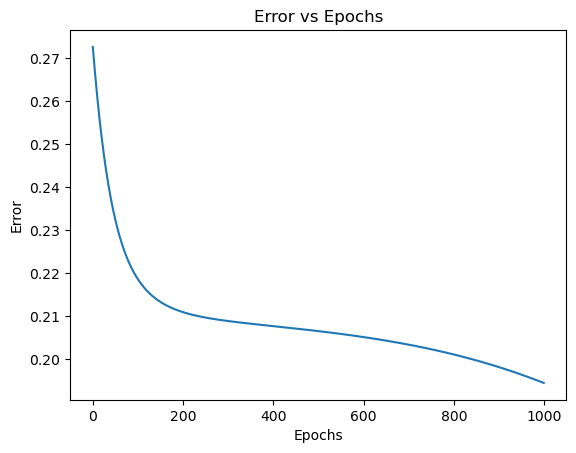

In [21]:
import numpy as np

# Define sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize AND gate input and output (truth table)
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[0], [0], [0], [1]])  # AND gate logic

# Set learning rate and initialize random weights
learning_rate = 0.05
np.random.seed(42)  # For reproducibility

# Initialize weights for input-to-hidden (V11, V12, V21, V22) and hidden-to-output (W1, W2)
weights_input_hidden = np.random.uniform(size=(2, 2))  # 2 inputs -> 2 hidden neurons
weights_hidden_output = np.random.uniform(size=(2, 1))  # 2 hidden neurons -> 1 output

# Define the number of epochs and convergence criteria
epochs = 1000
error_threshold = 0.002
errors = []  # To store errors after each epoch

# Training the neural network using backpropagation
for epoch in range(epochs):
    # Feedforward pass
    hidden_input = np.dot(inputs, weights_input_hidden)  # Input to hidden layer
    hidden_output = sigmoid(hidden_input)  # Activation at hidden layer
    
    final_input = np.dot(hidden_output, weights_hidden_output)  # Input to output layer
    final_output = sigmoid(final_input)  # Final output
    
    # Compute the error
    error = outputs - final_output
    squared_error = np.mean(np.square(error))
    errors.append(squared_error)
    
    # Check for convergence
    if squared_error <= error_threshold:
        print(f"Converged at epoch {epoch} with error {squared_error}")
        break
    
    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)  # Derivative of error w.r.t final output
    
    # Error propagated back to hidden layer
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)
    
    # Update weights
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate  # Update hidden to output weights
    weights_input_hidden += inputs.T.dot(d_hidden) * learning_rate  # Update input to hidden weights

# Display final weights after training
print("Final weights (input to hidden):\n", weights_input_hidden)
print("Final weights (hidden to output):\n", weights_hidden_output)

# Plot the error over epochs
import matplotlib.pyplot as plt

plt.plot(errors)
plt.title('Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


Final weights (input to hidden):
 [[0.37135022 0.96964506]
 [0.72935819 0.62828561]]
Final weights (hidden to output):
 [[-0.05688961]
 [ 0.08687657]]


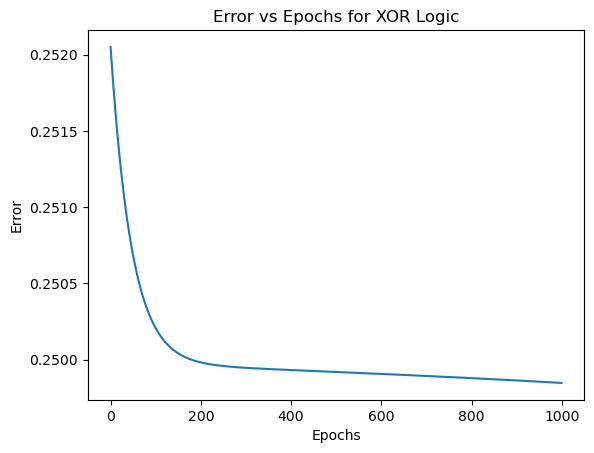

In [22]:
import numpy as np

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR gate input and output (truth table)
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[0], [1], [1], [0]])  # XOR gate logic

# Set learning rate and initialize random weights
learning_rate = 0.05
np.random.seed(42)

# Initialize weights for input-to-hidden (2 inputs -> 2 hidden neurons)
weights_input_hidden = np.random.uniform(size=(2, 2))

# Initialize weights for hidden-to-output (2 hidden neurons -> 1 output)
weights_hidden_output = np.random.uniform(size=(2, 1))

# Define the number of epochs and convergence criteria
epochs = 1000
error_threshold = 0.002
errors = []  # To store errors after each epoch

# Training loop using backpropagation
for epoch in range(epochs):
    # Feedforward pass
    hidden_input = np.dot(inputs, weights_input_hidden)  # Input to hidden layer
    hidden_output = sigmoid(hidden_input)  # Activation at hidden layer
    
    final_input = np.dot(hidden_output, weights_hidden_output)  # Input to output layer
    final_output = sigmoid(final_input)  # Final output
    
    # Compute the error
    error = outputs - final_output
    squared_error = np.mean(np.square(error))
    errors.append(squared_error)
    
    # Check for convergence
    if squared_error <= error_threshold:
        print(f"Converged at epoch {epoch} with error {squared_error}")
        break
    
    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)  # Derivative of error w.r.t final output
    
    # Error propagated back to hidden layer
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)
    
    # Update weights
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate  # Update hidden to output weights
    weights_input_hidden += inputs.T.dot(d_hidden) * learning_rate  # Update input to hidden weights

# Display final weights after training
print("Final weights (input to hidden):\n", weights_input_hidden)
print("Final weights (hidden to output):\n", weights_hidden_output)

# Plot the error over epochs
import matplotlib.pyplot as plt

plt.plot(errors)
plt.title('Error vs Epochs for XOR Logic')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


Final weights (input to hidden):
 [[0.2768894  1.09946975]
 [0.67640789 0.84486896]]
Final weights (hidden to output):
 [[ 0.15372255 -0.44920437]
 [-0.17777045  0.43438259]]


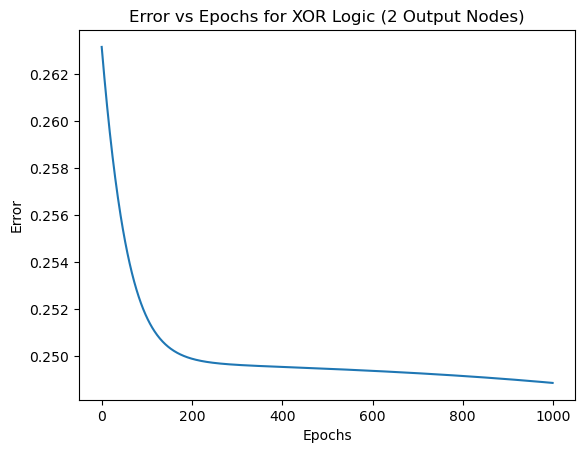

In [23]:
import numpy as np

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR gate input and output mapped to [O1, O2]
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[1, 0],  # XOR(0, 0) -> [1, 0]
                    [0, 1],  # XOR(0, 1) -> [0, 1]
                    [0, 1],  # XOR(1, 0) -> [0, 1]
                    [1, 0]]) # XOR(1, 1) -> [1, 0]

# Set learning rate and initialize random weights
learning_rate = 0.05
np.random.seed(42)

# Initialize weights for input-to-hidden (2 inputs -> 2 hidden neurons)
weights_input_hidden = np.random.uniform(size=(2, 2))

# Initialize weights for hidden-to-output (2 hidden neurons -> 2 outputs)
weights_hidden_output = np.random.uniform(size=(2, 2))

# Define the number of epochs and convergence criteria
epochs = 1000
error_threshold = 0.002
errors = []  # To store errors after each epoch

# Training loop using backpropagation
for epoch in range(epochs):
    # Feedforward pass
    hidden_input = np.dot(inputs, weights_input_hidden)  # Input to hidden layer
    hidden_output = sigmoid(hidden_input)  # Activation at hidden layer
    
    final_input = np.dot(hidden_output, weights_hidden_output)  # Input to output layer
    final_output = sigmoid(final_input)  # Final output (2 nodes)
    
    # Compute the error
    error = outputs - final_output
    squared_error = np.mean(np.square(error))  # Mean squared error across both output nodes
    errors.append(squared_error)
    
    # Check for convergence
    if squared_error <= error_threshold:
        print(f"Converged at epoch {epoch} with error {squared_error}")
        break
    
    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)  # Derivative of error w.r.t final output
    
    # Error propagated back to hidden layer
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)
    
    # Update weights
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate  # Update hidden to output weights
    weights_input_hidden += inputs.T.dot(d_hidden) * learning_rate  # Update input to hidden weights

# Display final weights after training
print("Final weights (input to hidden):\n", weights_input_hidden)
print("Final weights (hidden to output):\n", weights_hidden_output)

# Plot the error over epochs
import matplotlib.pyplot as plt

plt.plot(errors)
plt.title('Error vs Epochs for XOR Logic (2 Output Nodes)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


In [24]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the datasets for AND and XOR gates
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create and train MLPClassifier for AND Gate
clf_and = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)
clf_and.fit(X_and, y_and)

# Predict and evaluate for AND Gate
y_pred_and = clf_and.predict(X_and)
print(f'AND Gate Accuracy: {accuracy_score(y_and, y_pred_and)}')
print(f'AND Gate Predictions: {y_pred_and}')

# Create and train MLPClassifier for XOR Gate
clf_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)
clf_xor.fit(X_xor, y_xor)

# Predict and evaluate for XOR Gate
y_pred_xor = clf_xor.predict(X_xor)
print(f'XOR Gate Accuracy: {accuracy_score(y_xor, y_pred_xor)}')
print(f'XOR Gate Predictions: {y_pred_xor}')


AND Gate Accuracy: 0.75
AND Gate Predictions: [0 0 0 0]
XOR Gate Accuracy: 1.0
XOR Gate Predictions: [0 1 1 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data = pd.read_excel("C:/Users/Admin/Downloads/ml_dataset.xlsx")
data = data.dropna(subset=['Telugu', 'Hindi'])

# Extract features and target
X = data['Telugu']
y = data['Hindi']

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Encode the target variable (e.g., convert text labels to integers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# Create and train the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict on test data
y_test_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy}')
print(f'Predictions: {label_encoder.inverse_transform(y_test_pred)}')
print(f'Actual: {label_encoder.inverse_transform(y_test)}')


Accuracy: 0.0125
Predictions: ['हैदराबाद, 12 नवम्बर (वार्ता) कार्वी वेल्थ इंडिया की रिपोर्ट में अनुमान लगाया गया है कि अचल संपत्ति के रूप में व्यक्तियों की संपत्ति अगले पांच वर्षों में 121 लाख करोड़ रुपये तक पहुंच सकती है। पिछले वित्त वर्ष (2016-17) में रियल एस्टेट में व्यक्तियों की संपत्ति सालाना आधार पर 8.62 प्रतिशत बढ़कर 60.25 लाख करोड़ रुपये हो गई। इस रिपोर्ट की अधिक झलकियां। सोना और रीयल एस्टेट जैसी व्यक्तिगत संपत्तियों का धन आलोच्य वित्त वर्ष में 5.62 प्रतिशत बढ़कर 140 लाख करोड़ रुपये हो गया। पिछले वित्त वर्ष (2015-16) में इस क्षेत्र में निजी संपत्ति में 10.32 प्रतिशत की वृद्धि दर्ज की गई थी। पिछले वित्त वर्ष में सोने के रूप में व्यक्तिगत संपत्ति बढ़कर 68.45 लाख करोड़ रुपये हो गई। व्यक्तियों की भौतिक संपत्ति का लगभग आधा हिस्सा सोने के स्वामित्व में है। भौतिक संपत्ति में रीयल्टी और सोने की हिस्सेदारी 91 प्रतिशत है। हीरे के रूप में व्यक्तिगत संपत्ति पिछले वित्त वर्ष में 5.07 प्रतिशत बढ़कर 7.89 लाख करोड़ रुपये रही। चांदी के रूप में संपत्ति 1.63 प्रतिशत बढ़कर 2.29 लाख करोड़ रुपये हो 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
